In [1]:
import pandas as pd
from datetime import datetime
from zoe import cases, query, pickle, find_previous, plot_study, plot_study_evolution

In [2]:
uk_active_cases = query("SELECT * FROM uk_active_cases", index='date')
uk_active_cases.index = pd.to_datetime(uk_active_cases.index, format='%Y%m%d')
uk_active_cases

,cartodb_id,the_geom,the_geom_webmercator,corrected_covid_positive
date,,,,
2020-06-12,36937,None,None,85832.649263
2020-06-13,36938,None,None,79744.447242
2020-06-14,36939,None,None,74089.668745
2020-06-15,36940,None,None,68762.920085
2020-06-16,36941,None,None,64018.166682
...,...,...,...,...
2021-03-05,37203,None,None,131062.936145
2021-03-06,37204,None,None,127250.789757
2021-03-07,37205,None,None,123274.387520


In [3]:
curr_date = uk_active_cases.index.max()
print(pickle(uk_active_cases, 'uk_active_cases', curr_date))

/Users/chris/coronavirus/data/zoe_uk_active_cases_2021-03-09_2021-03-09-17-22.pickle


In [4]:
prev_date, prev_uk_active_cases = find_previous(curr_date)

/Users/chris/coronavirus/data/zoe_uk_active_cases_2021-03-08_2021-03-08-16-40.pickle


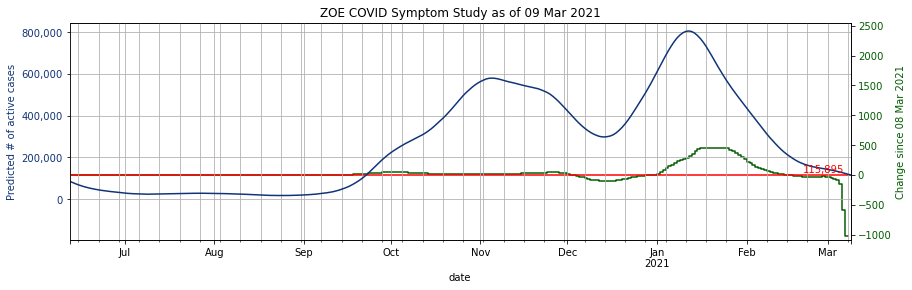

In [5]:
plot_study(curr_date, prev_date, uk_active_cases, prev_uk_active_cases)

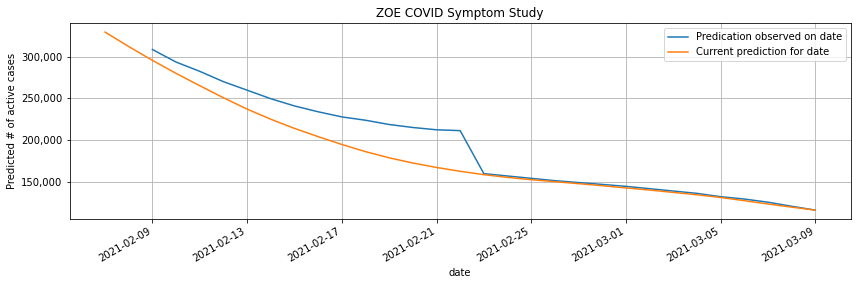

In [6]:
plot_study_evolution(curr_date, days=30)

In [7]:
prevalence_map = query("SELECT * FROM prevalence_map")
prevalence_map['percentage'] = prevalence_map['percentage'].astype(float)

In [8]:
for_date, = prevalence_map['data_status'].unique()
print(pickle(prevalence_map, 'prevalence_map', datetime.strptime(for_date, '%H:%M:%S %d-%m-%Y')))

/Users/chris/coronavirus/data/zoe_prevalence_map_2021-03-09_2021-03-09-17-22.pickle


In [9]:
prevalence_map[['lad16nm', 'lad16cd', 'percentage']].sort_values('percentage', ascending=False)[:10]

,lad16nm,lad16cd,percentage
244,Nuneaton and Bedworth,E07000219,2.255318
180,Cannock Chase,E07000192,1.294179
70,North East Derbyshire,E07000038,1.001008
2,Redcar and Cleveland,E06000003,0.963706
189,West Lindsey,E07000142,0.914074
205,Ashfield,E07000170,0.898079
266,Bolton,E08000001,0.893415
297,Falkirk,S12000014,0.820679
48,Aylesbury Vale,E07000004,0.801580
294,Walsall,E08000030,0.780617
